## PS1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

from scipy.stats import gaussian_kde
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

### 1D kernel density estimator (5 points).

In [3]:
covid_df = pd.read_csv('COVIDincubation.txt')
covid_df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


### 1.a
Create three histograms, each of symp days (Incubation period, days to
symptomatic). The rst one is the overall histogram. Let each histgram
have 15 bins over the range of days from 2 to 15 (the maximum in the
data). In the matplotlib.pyplot.hist() call, set the histogram to den-
sity density=True. Let the rst histogram be for all the data. Let the
second histogram be for individuals of age 40, and let the third histogram
be for individuals age> 40.

Text(0,0.5,'Frequency for each group of observations')

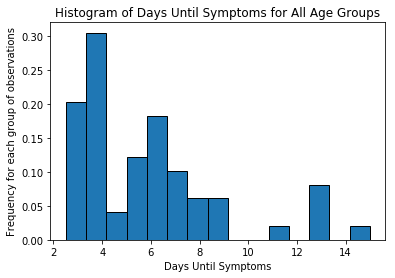

In [8]:
symp_days_total = covid_df['symp_days'].values

num_bins = 15
N_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_total, num_bins, 
                                    density = True,edgecolor = 'black')

plt.title('Histogram of Days Until Symptoms for All Age Groups')
plt.xlabel('Days Until Symptoms')
plt.ylabel('Frequency for each group of observations')

Text(0,0.5,'Frequency for each group of observations')

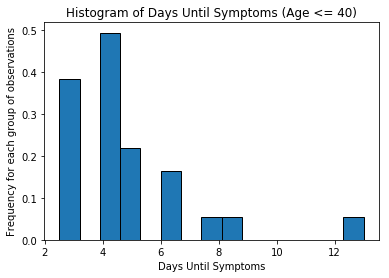

In [14]:
symp_days_young = covid_df['symp_days'][covid_df['age'] <= 40].values

n_young, bin_cuts_young, patches_young = plt.hist(symp_days_young, num_bins, 
                                    density=True, edgecolor = 'black')

plt.title('Histogram of Days Until Symptoms (Age <= 40)')
plt.xlabel('Days Until Symptoms')
plt.ylabel('Frequency for each group of observations')

Text(0,0.5,'Frequency for each group of observations')

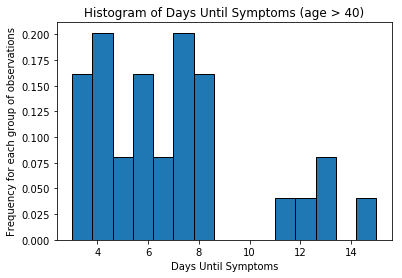

In [16]:
symp_days_old = covid_df['symp_days'][covid_df['age'] > 40].values

n_old, bin_cuts_old, patches_old = plt.hist(symp_days_old, num_bins, 
                                    density=True, edgecolor = 'black')

plt.title('Histogram of Days Until Symptoms (age > 40)')
plt.xlabel('Days Until Symptoms')
plt.ylabel('Frequency for each group of observations')

### 1.b
Fit a Gaussian KDE as an approximation ot the incubation period for
each of the three subsets of data from part (a). Use the GridSearchCV and
LeaveOneOut methods as in the VanderPlas notebook to choose an optimal
bandwith, and report your optimal bandwidths for the three KDEs. For
your grid search, use 500 exponentially spaced bandwidths between 0.1
and 10 using the code: bandwidths = 10 ** np.linspace(-1, 1, 500).
Plot each of the KDE distributions in one plot with a legend that shows
which is which. This gure should look like the right panel of Figure 2 in Men et al. (2020).

In [19]:
# Find optimal bandwidth of KDE for all ages
N_total = symp_days_total.size
bws = 10 ** np.linspace(-1, 1, 500)
grid_total = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bws}, cv=LeaveOneOut())
grid_total.fit(symp_days_total.reshape((N_total, 1)))
bws_total_opt = grid_total.best_params_['bandwidth']

In [20]:
# Find optimal bandwidth of KDE for age > 40
N_old = symp_days_old.size
bws = 10 ** np.linspace(-1, 1, 500)
grid_old = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bws}, cv=LeaveOneOut())
grid_old.fit(symp_days_old.reshape((N_old, 1)))
bws_old_opt = grid_old.best_params_['bandwidth']

In [21]:
# Find optimal bandwidth of KDE for age <= 40
N_young = symp_days_young.size
bws = 10 ** np.linspace(-1, 1, 500)
grid_young = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bws}, cv=LeaveOneOut())
grid_young.fit(symp_days_young.reshape((N_young, 1)))
bws_young_opt = grid_young.best_params_['bandwidth']

<IPython.core.display.Javascript object>


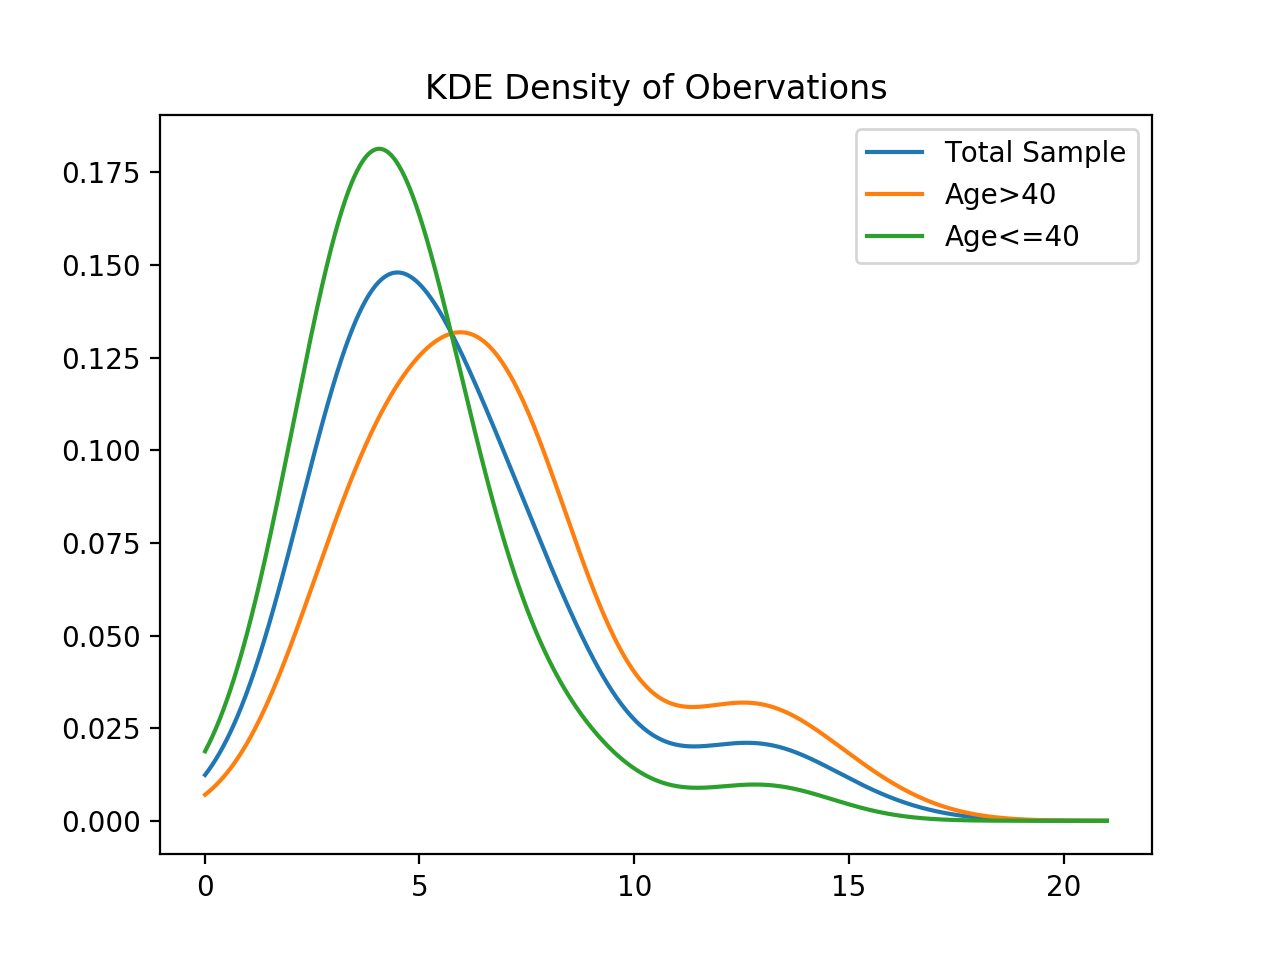

Text(0.5,1,'KDE Density of Obervations')

In [22]:
# plot the KDE for all ages
kde_total = KernelDensity(bandwidth=bws_total_opt, kernel='gaussian')
kde_total.fit(symp_days_total.reshape((N_total, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_total = kde_total.score_samples(x_pts).reshape((1000, 1))
plt.plot(x_pts, np.exp(logprob_total), label=r'Total Sample')
plt.legend()
plt.title('KDE Density of Obervations')

# plot the KDE for age > 40
kde_old = KernelDensity(bandwidth=bws_old_opt, kernel='gaussian')
kde_old.fit(symp_days_old.reshape((N_old, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_old = kde_old.score_samples(x_pts).reshape((1000, 1))
plt.plot(x_pts, np.exp(logprob_old), label=r'Age>40')
plt.legend()

# plot the KDE for age <= 40
kde_young = KernelDensity(bandwidth=bws_young_opt, kernel='gaussian')
kde_young.fit(symp_days_young.reshape((N_young, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_old = kde_young.score_samples(x_pts).reshape((1000, 1))
plt.plot(x_pts, np.exp(logprob_old), label=r'Age<=40')
plt.legend()

### 1.c
What does this tell you about COVID-19 incubation periods of young
versus old individuals?

The KDE distributions indicate that generally, 

1. Young people who aged under 40 have shorter incubation of COVID19, compared to the old group who aged above 40; 

2. The old group has a larger variance of incubation days while the variance of the young group is very small.

3. Young people have a incubation peak at day5 while old people have two incubation peaks at Day7 and Day13.


### 2D kernel density estimator (5 points).

### 2.a
Read in the BQ probmat.txt data as a 73  7 NumPy array. Plot the
2D empirical histogram of these data as a 3D surface plot with age and
income group on the x-axis and y-axis and the histogram density on the
z-axis using a 3D surface plot tool (not a 3D bar histogram tool). Make
sure that the axes are labeled correctly. And make sure that your 3D
histogram is presented from a perspective that allows a viewer to see that
data (don't let the data be hidden by a poor angle of the plot.)

In [13]:
bq_data = np.loadtxt('BQ_probmat.txt', delimiter=',')
bq_data.size
bq_data.shape

(73, 7)

Text(0.5,0,'Percent of BQ received')

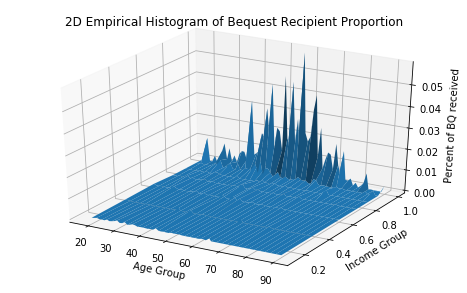

In [14]:
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85,
                          0.94, 0.995])
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure(figsize=(8,5))
ax = fig.gca(projection ='3d')
ax.plot_surface(age_mat, income_mat, bq_data)
ax.set_title('2D Empirical Histogram of Bequest Recipient Proportion')
ax.set_xlabel('Age Group')
ax.set_ylabel('Income Group')
ax.set_zlabel('Percent of BQ received')

### 2.b
Use the BQ ind data.txt data to t a bivariate Gaussian kernel den-
sity estimator to the data using the scipy.stats.gaussian kde method.
Choose a bandwidth parameter  that you think is best. Justify your
choice of that parameter. Your justication should have to do with the
tradeo between overtting (too low a value) and undertting (too high
a value). Plot the surface of your chosen kernel density estimator. Make
sure that the axes are labeled correctly. And make sure that your 3D his-
togram is presented from a perspective that allows a viewer to see that
data. What is the estimated density for bequest recipients who are age 61
in the 6th lifetime income category (j = 6, 90th to 99th percentile).

In [2]:
bq_df = pd.read_csv("BQ_ind_data.txt")
bq_df.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


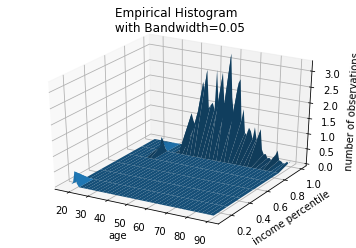

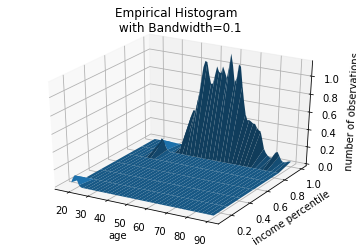

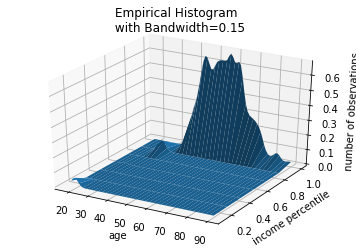

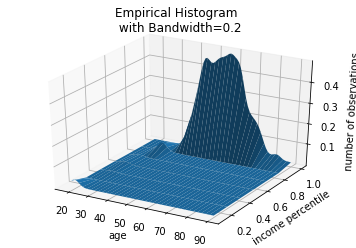

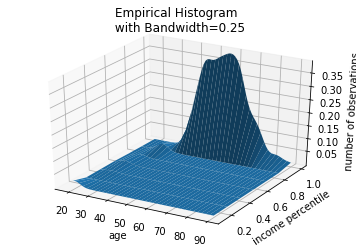

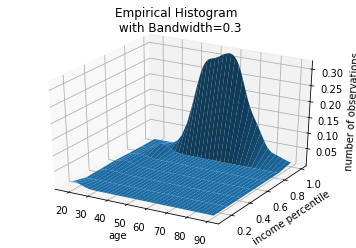

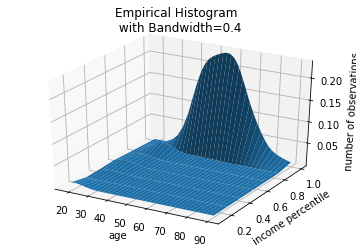

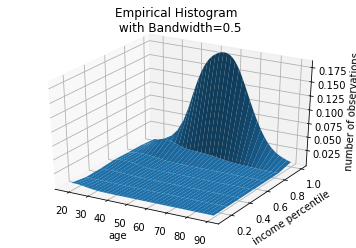

In [10]:
bq_mat = bq_df.values
age_array = bq_df['age']
income_array = bq_df['income_pctl']
age_min, age_max = age_array.min(), age_array.max()
income_min, income_max = income_array.min(), income_array.max()
age_pos, income_pos = np.mgrid[age_min:age_max:73j, income_min:income_max:7j]
positions = np.vstack([age_pos.ravel(), income_pos.ravel()])
for bws in [0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5]:
    kde_density = gaussian_kde(bq_mat.T, bw_method=bws)
    freq = np.reshape(kde_density(positions), age_pos.shape)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(age_pos, income_pos, freq)
    ax.set_xlabel('age')
    ax.set_ylabel('income percentile')
    ax.set_zlabel('number of observations')
    ax.set_title("Empirical Histogram \n with Bandwidth={}".format(bws))

From the graphs above, it is reasonable to choose bws = 0.3 as it balances between variance and bias, not overfitting or underfitting the data.

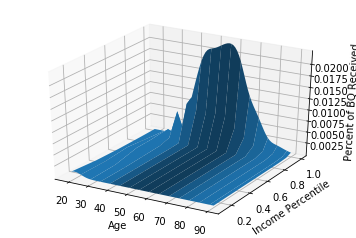

In [15]:
bw = 0.3
kernel = gaussian_kde(bq_df.T, bw_method=bw)

coords = np.vstack([items.ravel() for items in [age_mat, income_mat]])
Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_xlabel("Age")
ax.set_ylabel("Income Percentile")
ax.set_zlabel("Percent of BQ Received")
plt.show()

In [19]:
print("Estimated density for age 61 in the 6th lifetime income category:", Z_scaled[44,5])

Estimated density for age 61 in the 6th lifetime income category: 0.005044092757888886
